In [ ]:
!kaggle datasets download -d danofer/sarcasm
!unzip sarcasm.zip

Dataset URL: https://www.kaggle.com/datasets/danofer/sarcasm
License(s): copyright-authors
 99% 214M/216M [00:06<00:00, 44.5MB/s]
100% 216M/216M [00:06<00:00, 33.7MB/s]
Archive:  sarcasm.zip
  inflating: test-balanced.csv       
  inflating: test-unbalanced.csv     
  inflating: train-balanced-sarc.csv.gz  
  inflating: train-balanced-sarcasm.csv  


In [ ]:
import pandas as pd

dataset = pd.read_csv("train-balanced-sarcasm.csv")

# Data Analysis

In [ ]:
dataset.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [10]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 588.1 MB


In [ ]:
dataset.shape

(1010826, 10)

# Data Cleaning

Checking for null values and removing them

In [ ]:
print("Number of NULL values:")
print(dataset.isnull().sum())

print("Number of NULL values post-removal:")
dataset.dropna(inplace=True)
print(dataset.isnull().sum())

Number of NULL values:
label              0
comment           55
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64
Number of NULL values post-removal:
label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64


Checking for duplicate values and removing them

In [ ]:
print("Number of Duplicate Values:")
print(dataset.duplicated().sum())

print("Number of Duplicate Values post-removal:")
dataset.drop_duplicates(inplace=True)
print(dataset.duplicated().sum())

Number of Duplicate Values:
28
Number of Duplicate Values post-removal:
0


Class Distribution

In [ ]:
dataset["label"].value_counts()

,count
label,
0,505403
1,505340


In [ ]:
dataset.drop(["author", "subreddit", "score", "ups", "downs", "date", "created_utc", "parent_comment"], axis=1, inplace=True)

Data preprocessing

In [ ]:
!pip install contractions

In [ ]:
import re
import contractions

def preprocessing(text):
    text = text.lower().strip()
    text = contractions.fix(text)
    text = re.sub('\n', '', text)
    
    re.sub(r"([?!,+=—&%\'\";:|\(\){}\[\]//])", r" \1 ", text)
    re.sub('[ ]{2,}', ' ', text).strip()

    return text

In [ ]:
dataset["comment"] = dataset["comment"].apply(preprocessing)
dataset.head()

,label,comment
0,0,nc and nh.
1,0,you do know west teams play against west teams...
2,0,"they were underdogs earlier today, but since g..."
3,0,"this meme is not funny none of the ""new york n..."
4,0,i could use one of those tools.


Class Distribution Plot

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

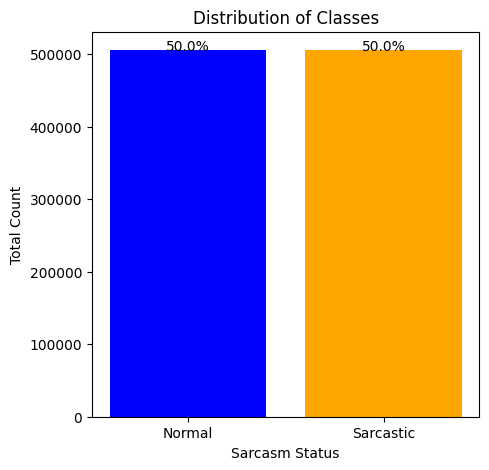

In [ ]:
class_counts = dataset["label"].value_counts()

plt.figure(figsize=(5, 5))
plt.bar(class_counts.index, class_counts.values, color=["blue", "orange"])

plt.xticks([0, 1], ["Normal", "Sarcastic"])
plt.xlabel("Sarcasm Status")
plt.ylabel("Total Count")
plt.title("Distribution of Classes")

total = class_counts.sum()
for i, count in enumerate(class_counts):
    plt.text(i, count + 3, f"{(count/total)*100:.1f}%", ha="center")

plt.show()